# <font color='dark'>**Rankings de distritos com PCA**</h1>

# Aula 1: Introdução ao PCA

## <font color='dark'> **1.2 Entendendo o problema</font>**

#### Importando a biblioteca `pandas` e o conjunto de dados

In [ ]:
import pandas as pd

In [ ]:
distritos_sp = pd.read_csv('/content/distritos_sp.csv')

In [ ]:
distritos_sp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994
...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998


## <font color='dark'> **1.3 Matriz de correlação**

In [ ]:
distritos_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cod_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


#### Criando matriz de correlação a partir das variáveis numéricas

In [ ]:
variaveis_numericas = distritos_sp.drop(['cod_ibge', 'distritos'], axis = 1)
variaveis_numericas.corr()

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
renda,1.000000,0.920099,0.777332,0.732307,-0.519585,-0.424711,-0.462516,-0.146957,-0.019711
quota,0.920099,1.000000,0.850455,0.832737,-0.520282,-0.554767,-0.491020,-0.243010,0.057374
escolaridade,0.777332,0.850455,1.000000,0.955825,-0.582601,-0.692968,-0.606621,-0.432548,0.157673
idade,0.732307,0.832737,0.955825,1.000000,-0.553758,-0.703237,-0.615073,-0.499838,0.141469
mortalidade,-0.519585,-0.520282,-0.582601,-0.553758,1.000000,0.346049,0.422790,0.130877,-0.093018
txcresc,-0.424711,-0.554767,-0.692968,-0.703237,0.346049,1.000000,0.234472,0.281853,-0.279084
causasext,-0.462516,-0.491020,-0.606621,-0.615073,0.422790,0.234472,1.000000,0.404447,-0.045281
favel,-0.146957,-0.243010,-0.432548,-0.499838,0.130877,0.281853,0.404447,1.000000,-0.106481
denspop,-0.019711,0.057374,0.157673,0.141469,-0.093018,-0.279084,-0.045281,-0.106481,1.000000


In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Calculando estatística KMO

O critério ou teste de Kaiser-Meyer-Olkin (KMO) é um critério para identificar se um modelo de análise fatorial que está sendo utilizado é adequadamente ajustado aos dados, testando a consistência geral dos dados.

Resulta em um índice, sendo uma estatística que indica a proporção da variância dos dados que pode ser considerada comum a todas as variáveis, ou seja, que pode ser atribuída a um fator comum. 

Essa estatística varia de O a 1, e, enquanto valores mais próximos de 1 indicam que as variáveis compartilham um percentual de variância bastante elevado
(correlações de Pearson altas), valores mais próximos de O são decorrentes de correlações de Pearson baixas entre as variáveis, o que pode indicar que a análise fatorial será inadequada.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo

In [ ]:
kmo_variaveis, kmo = calculate_kmo(variaveis_numericas)

In [ ]:
kmo_variaveis

array([0.77458268, 0.8162995 , 0.85349799, 0.81435935, 0.94571275,
       0.83865337, 0.88877823, 0.78520104, 0.62787251])

In [ ]:
kmo

0.8301590047345352

### Realizando o teste de esfericidade de Bartlett

O teste de esfericidade de Bartlett consiste em comparar a matriz de correlações ρ com uma matriz identidade **I** de mesma dimensão. Se as diferenças entre os valores correspondentes fora da diagonal principal de cada matriz não forem estatisticamente diferentes de 0, a determinado nível de significância, poderemos considerar que a extração dos fatores não será adequada.

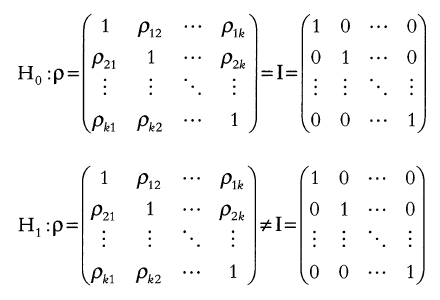

**Obs**: Deve ser sempre preferido o teste de esfericidade de Bartlett à estatística KMO para efeitos de decisão sobre a adequação global da análise fatorial, visto que, enquanto o primeiro é um teste com determinado nível de significância, o segundo é apenas um coeficiente (estatística) calculado sem
distribuição de probabilidades determinada e hipóteses que permitam avaliar o nível correspondente de significância para efeitos de decisão.

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [ ]:
qui_quadrado, pvalor = calculate_bartlett_sphericity(variaveis_numericas)

In [ ]:
print(qui_quadrado)
print(pvalor)

756.75101418327
9.27120181821801e-136


In [ ]:
pvalor < 0.05

True

Como o valor do p-value é menor do que o nível de significância de 5%, podemos rejeitar a hipótese nula de que a matriz de correlação ρ é igual a matriz identidade

# Aula 2: Aprofundando no PCA

## <font color='dark'> **2.2 Executando o PCA nos dados**

In [ ]:
variaveis_numericas

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001
1,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001
2,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000
3,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993
4,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994
...,...,...,...,...,...,...,...,...,...
91,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993
92,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002
93,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003
94,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998


### Padronizando as variáveis numéricas

As diferentes escalas das variáveis pode afetar o PCA, portanto vamos padronizar as variáveis pelo método de ZScore.

\begin{align}
z = \frac{x - \mu}{\sigma}
\end{align}

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
colunas_numericas = variaveis_numericas.columns
colunas_numericas

Index(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade', 'txcresc',
       'causasext', 'favel', 'denspop'],
      dtype='object')

In [ ]:
padronizar = StandardScaler()
variaveis_numericas = padronizar.fit_transform(variaveis_numericas)
variaveis_numericas

array([[ 1.08502328e-01,  1.80715140e-01,  5.23096244e-01,
         1.05541274e+00, -4.29281808e-01, -5.38805723e-01,
        -7.80681293e-01, -7.56406323e-01,  5.21804668e-01],
       [ 2.40630528e+00,  1.98438577e+00,  1.32019516e+00,
         1.28464265e+00, -1.47188596e+00, -7.33574170e-01,
        -1.40197826e+00, -6.68425227e-01, -8.57183702e-01],
       [-7.90322801e-01, -1.13342509e+00, -1.27037668e+00,
        -1.00765651e+00, -1.27369371e-01,  5.17822174e+00,
        -2.08708641e+00, -7.56406323e-01, -1.84993379e+00],
       [-5.64581006e-01, -4.12654904e-01, -2.74002674e-01,
        -9.07368417e-02,  4.90544879e-01, -3.18259087e-01,
         2.21327218e-01, -7.04087705e-02,  7.83822446e-01],
       [-6.29818314e-01, -6.35605024e-01, -7.47280632e-02,
        -9.07368417e-02,  7.52202169e-01, -4.12779054e-01,
        -1.65420498e-01, -2.32344990e-01,  1.36865133e+00],
       [ 5.20636431e-01,  1.67189899e-01,  9.21645940e-01,
         8.26182822e-01, -1.48396254e+00, -6.247330

In [ ]:
dados_padronizados = pd.DataFrame(variaveis_numericas, columns=colunas_numericas)
dados_padronizados

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
0,0.108502,0.180715,0.523096,1.055413,-0.429282,-0.538806,-0.780681,-0.756406,0.521805
1,2.406305,1.984386,1.320195,1.284643,-1.471886,-0.733574,-1.401978,-0.668425,-0.857184
2,-0.790323,-1.133425,-1.270377,-1.007657,-0.127369,5.178222,-2.087086,-0.756406,-1.849934
3,-0.564581,-0.412655,-0.274003,-0.090737,0.490545,-0.318259,0.221327,-0.070409,0.783822
4,-0.629818,-0.635605,-0.074728,-0.090737,0.752202,-0.412779,-0.165420,-0.232345,1.368651
...,...,...,...,...,...,...,...,...,...
91,-0.467243,-0.467629,-0.274003,-0.090737,-0.113280,-0.415643,0.297211,-0.438909,1.804943
92,-0.104813,0.069895,0.124547,0.596953,-0.328644,-0.742167,-0.197326,0.190984,0.032016
93,1.153335,0.476964,0.323822,-0.090737,0.154416,-0.269567,0.154929,1.147301,-0.400020
94,0.197556,-0.304016,-0.274003,-0.319967,-0.340721,0.191576,-0.376687,0.333794,-0.545923


### Realizando o PCA nos dados

O procedimento de análise fatorial consiste primeiramente em obter autovalores e autovetores da matriz de correlação dos dados.

Logo após isso, o autovetor será dividido pela raiz quadrada do respectivo autovalor, gerando assim os **scores fatoriais** para cada variável e em cada um dos fatores.

Os scores fatoriais são então multiplicados pelas variáveis padronizadas e soma-se os resultados para cada um dos fatores, gerando assim os componentes do PCA.






In [ ]:
from sklearn.decomposition import PCA

Serão extraídos a quantidade de fatores igual a quantidade de variáveis

In [ ]:
n_fatores = dados_padronizados.shape[1]
n_fatores

9

In [ ]:
pca = PCA(n_components=n_fatores)
pca.fit(dados_padronizados)

PCA(n_components=9)

# Aula 3: Análise de fatores

## <font color='dark'> **3.1 Checando a variância explicada pelos fatores**

`pca.explained_variance_ratio_` nos dá a porcentagem de variância explicada por cada um dos fatores gerados pela análise de componentes principais.

In [ ]:
pca.explained_variance_ratio_

array([0.55067008, 0.1293709 , 0.11070601, 0.08045185, 0.05881136,
       0.04425824, 0.01440763, 0.00722961, 0.00409432])

In [ ]:
import plotly.express as px
import numpy as np

Definindo um nome para cada um dos fatores

In [ ]:
fatores = [f'F{i+1}' for i in range(n_fatores)]
fatores

['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']

In [ ]:
fig = px.bar(x = fatores, y = pca.explained_variance_ratio_, text = np.around(pca.explained_variance_ratio_, decimals = 2),
             title = 'Scree Plot')
fig.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

In [ ]:
variancia_acumulada = [sum(pca.explained_variance_ratio_[0:i+1]) for i in range(n_fatores)]
variancia_acumulada

[0.5506700772160416,
 0.6800409820794436,
 0.7907469955852218,
 0.8711988432249138,
 0.930010202543966,
 0.9742684414070405,
 0.9886760753033329,
 0.9959056848263387,
 1.0000000000000002]

In [ ]:
fig = px.bar(x = fatores, y = variancia_acumulada, text = np.around(variancia_acumulada, decimals = 2),
             title = 'Scree Plot')
fig.update_layout(yaxis = {'title':'Porcentagem de variância explicada', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Fatores', 'tickfont':{'size':15}},
                  title = {'font':{'size':25}})
fig.show()

`pca.explained_variance_` representam a quantidade de variáveis explicadas por cada um dos fatores.

O valor mais exato pode ser obtido multiplicando a `pca.explained_variance_ratio_` pela quantidade de fatores.

In [ ]:
pca.explained_variance_

array([5.00819944, 1.17659433, 1.00684206, 0.73168838, 0.53487384,
       0.40251704, 0.13103364, 0.0657514 , 0.03723672])

In [ ]:
pca.explained_variance_ratio_ * n_fatores

array([4.95603069, 1.16433814, 0.99635412, 0.72406663, 0.52930223,
       0.39832415, 0.12966871, 0.06506649, 0.03684884])

In [ ]:
print(sum(pca.explained_variance_))
print(sum(pca.explained_variance_ratio_ * n_fatores))

9.094736842105258
9.000000000000004


In [ ]:
autovalores = pca.explained_variance_ratio_ * n_fatores

O critério de escolha da quantidade de fatores, em que são levados em consideração apenas os fatores correspondentes a autovalores
maiores que 1, é comumente utilizado e conhecido por critério da **raiz latente** ou **critério de Kaiser**.

Nesse caso vamos selecionar os dois primeiros fatores, que possuem autovalores maiores que 1.

In [ ]:
fatores_selecionados = ['Fator selecionado' if autovalor > 1 else 'Fator não selecionado' for autovalor in autovalores]
fatores_selecionados

['Fator selecionado',
 'Fator selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado',
 'Fator não selecionado']

In [ ]:
fig = px.bar(x = range(1,10), y = autovalores, text = np.around(autovalores, decimals = 2),
             title = 'Scree Plot', color = fatores_selecionados)
fig.update_layout(yaxis = {'title': 'Quantidade de variáveis explicadas', 'tickfont':{'size':15}},
                  xaxis = {'title': 'Autovalor', 'tickfont': {'size': 15}},
                  title = {'font':{'size':25}})
fig.show()

In [ ]:
resumo = pd.DataFrame({'Fator': fatores, 'Autovalor': autovalores, 'Variância explicada': pca.explained_variance_ratio_, 'Variância acumulada': variancia_acumulada})
resumo

,Fator,Autovalor,Variância explicada,Variância acumulada
0,F1,4.956031,0.550670,0.550670
1,F2,1.164338,0.129371,0.680041
2,F3,0.996354,0.110706,0.790747
3,F4,0.724067,0.080452,0.871199
4,F5,0.529302,0.058811,0.930010
5,F6,0.398324,0.044258,0.974268
6,F7,0.129669,0.014408,0.988676
7,F8,0.065066,0.007230,0.995906
8,F9,0.036849,0.004094,1.000000


Através do resumo, podemos verificar que os dois primeiros fatores explicam 68% da variância total dos dados.

## <font color='dark'> **3.2 Cargas fatoriais e comunalidades**

Os pesos que cada variável tem em cada componente principal obtido pela PCA pode ser obtido através de `pca.components_`, são os autovetores extraídos da matriz de correlação

In [ ]:
pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578],
       [ 0.34200389,  0.27796072,  0.00388393, -0.03140668,  0.68113225,
         0.35010444, -0.28968662,  0.14639622,  0.33601377],
       [ 0.30718994,  0.21266882, -0.051763  , -0.06507346, -0.21449531,
         0.46702002,  0.58641913, -0.46772469,  0.16347059],
       [ 0.35731885,  0.14779821, -0.5314497 , -0.53511308, -0.08829316,
        -0.42300489, -0.21675972, -0.21903914, -0.00154526],
       [-0.56495425,  0.74089992, -0.33214191,  0.12879361, -0

In [ ]:
pd.DataFrame(pca.components_, columns = colunas_numericas, index = [f'Autovetor {i+1}' for i in range(n_fatores)])

,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop
Autovetor 1,0.373786,0.404546,0.434164,0.431286,-0.294536,-0.312989,-0.299422,-0.205364,0.074692
Autovetor 2,0.341942,0.209864,-0.022792,-0.060653,-0.163695,0.312726,-0.040693,0.410400,-0.734953
Autovetor 3,-0.172958,-0.155014,-0.009357,0.063483,0.173795,0.277756,-0.439119,-0.688140,-0.410151
Autovetor 4,-0.063391,-0.139963,-0.084585,-0.126908,-0.580196,0.453115,-0.490352,0.158792,0.381486
Autovetor 5,0.342004,0.277961,0.003884,-0.031407,0.681132,0.350104,-0.289687,0.146396,0.336014
Autovetor 6,0.307190,0.212669,-0.051763,-0.065073,-0.214495,0.467020,0.586419,-0.467725,0.163471
Autovetor 7,0.357319,0.147798,-0.531450,-0.535113,-0.088293,-0.423005,-0.216760,-0.219039,-0.001545
Autovetor 8,-0.564954,0.740900,-0.332142,0.128794,-0.043236,0.046332,-0.022126,0.019462,-0.010178
Autovetor 9,-0.226373,0.235400,0.638974,-0.694279,0.002605,-0.004163,-0.011863,-0.045723,-0.027849


Raiz quadrada dos autovalores

In [ ]:
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores

array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

Obtendo as cargas fatoriais a partir dos autovetores e autovalores

In [ ]:
cargas_fatoriais = pd.DataFrame(pca.components_.T * raiz_autovalores, columns = fatores, index = colunas_numericas)

In [ ]:
cargas_fatoriais

,F1,F2,F3,F4,F5,F6,F7,F8,F9
renda,0.832127,0.368971,-0.172642,-0.053941,0.248819,0.193877,0.128669,-0.144109,-0.043455
quota,0.900606,0.226453,-0.154732,-0.119098,0.202225,0.134222,0.053221,0.188990,0.045188
escolaridade,0.966543,-0.024594,-0.009340,-0.071975,0.002826,-0.032669,-0.191373,-0.084723,0.122658
idade,0.960135,-0.065447,0.063367,-0.107989,-0.022849,-0.041070,-0.192692,0.032853,-0.133274
mortalidade,-0.655699,-0.176634,0.173478,-0.493701,0.495545,-0.135374,-0.031794,-0.011029,0.000500
txcresc,-0.696781,0.337446,0.277249,0.385565,0.254712,0.294750,-0.152322,0.011818,-0.000799
causasext,-0.666578,-0.043910,-0.438317,-0.417250,-0.210756,0.370106,-0.078054,-0.005644,-0.002277
favel,-0.457185,0.442840,-0.686884,0.135120,0.106508,-0.295195,-0.078875,0.004964,-0.008777
denspop,0.166281,-0.793048,-0.409402,0.324614,0.244461,0.103171,-0.000556,-0.002596,-0.005346


Resumo dos fatores F1 e F2 selecionados a partir do critério de Kaiser

In [ ]:
resumo_cargas_fatoriais = cargas_fatoriais[['F1', 'F2']].copy()
resumo_cargas_fatoriais

,F1,F2
renda,0.832127,0.368971
quota,0.900606,0.226453
escolaridade,0.966543,-0.024594
idade,0.960135,-0.065447
mortalidade,-0.655699,-0.176634
txcresc,-0.696781,0.337446
causasext,-0.666578,-0.043910
favel,-0.457185,0.442840
denspop,0.166281,-0.793048


In [ ]:
fig = px.scatter(cargas_fatoriais, x = 'F1', y = 'F2', text = cargas_fatoriais.index)
fig.update_traces(textposition = 'top center')
fig.show()

### Verificando as comunalidades de cada uma das variáveis

As comunalidades representam a variância total compartilhada de cada uma das variáveis originais com todos os fatores extraídos.

In [ ]:
resumo_cargas_fatoriais['Comunalidades'] = (resumo_cargas_fatoriais ** 2).sum(axis = 1)
resumo_cargas_fatoriais

,F1,F2,Comunalidades
renda,0.832127,0.368971,0.828575
quota,0.900606,0.226453,0.862372
escolaridade,0.966543,-0.024594,0.934811
idade,0.960135,-0.065447,0.926143
mortalidade,-0.655699,-0.176634,0.461141
txcresc,-0.696781,0.337446,0.599374
causasext,-0.666578,-0.043910,0.446254
favel,-0.457185,0.442840,0.405126
denspop,0.166281,-0.793048,0.656574


# Aula 4: Obtendo os fatores principais

## <font color='dark'> **4.1 Obtendo os scores fatoriais**

In [ ]:
pd.DataFrame(pca.transform(dados_padronizados), columns = fatores)

,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1.519105,-0.761299,0.440370,0.256326,-0.134060,-0.202264,-0.177369,0.025619,-0.350088
1,3.985600,1.555514,0.313021,0.070926,0.100206,0.332763,0.655952,-0.105873,-0.055641
2,-2.681205,2.356295,3.872196,3.061874,1.039798,0.920633,-0.793794,0.194619,-0.111070
3,-0.574202,-1.061710,-0.214948,-0.121274,0.105649,-0.204103,-0.011002,0.042348,-0.100050
4,-0.457007,-1.688282,-0.110352,0.089602,0.452111,-0.437592,-0.037891,-0.168406,-0.013653
...,...,...,...,...,...,...,...,...,...
91,-0.222504,-1.876371,-0.553807,0.480278,-0.054540,0.281924,0.172851,-0.051022,-0.148682
92,0.651970,-0.175635,-0.277139,-0.095741,-0.422490,-0.538550,-0.068902,0.134096,-0.299739
93,0.452520,1.141560,-1.023709,-0.413869,0.530598,-0.225303,0.175189,-0.413634,0.079473
94,-0.262248,0.698634,0.148829,0.407752,-0.198409,-0.272673,0.300921,-0.243063,-0.066496


In [ ]:
pca2 = PCA(n_components=2)
pd.DataFrame(pca2.fit_transform(dados_padronizados), columns = ['F1', 'F2'])

,F1,F2
0,1.519105,-0.761299
1,3.985600,1.555514
2,-2.681205,2.356295
3,-0.574202,-1.061710
4,-0.457007,-1.688282
...,...,...
91,-0.222504,-1.876371
92,0.651970,-0.175635
93,0.452520,1.141560
94,-0.262248,0.698634


Fórmula dos fatores

\begin{align}
\mathbf{F_{1}} = s_{11} * Zx + ... + s_{1n} * Zw
\end{align}
\begin{align}
...
\end{align}
\begin{align}
\mathbf{F_{n}} = s_{n1} * Zx + ... + s_{nn} * Zw
\end{align}

In [ ]:
pca.components_

array([[ 0.37378561,  0.40454585,  0.43416448,  0.431286  , -0.29453553,
        -0.31298937, -0.29942197, -0.20536447,  0.0746924 ],
       [ 0.34194215,  0.20986443, -0.02279207, -0.06065282, -0.16369471,
         0.31272645, -0.04069338,  0.41039975, -0.73495343],
       [-0.17295765, -0.15501444, -0.00935731,  0.06348322,  0.17379496,
         0.27775581, -0.43911857, -0.68814007, -0.41015077],
       [-0.06339126, -0.13996332, -0.08458471, -0.12690816, -0.58019562,
         0.45311541, -0.49035151,  0.1587924 ,  0.38148578],
       [ 0.34200389,  0.27796072,  0.00388393, -0.03140668,  0.68113225,
         0.35010444, -0.28968662,  0.14639622,  0.33601377],
       [ 0.30718994,  0.21266882, -0.051763  , -0.06507346, -0.21449531,
         0.46702002,  0.58641913, -0.46772469,  0.16347059],
       [ 0.35731885,  0.14779821, -0.5314497 , -0.53511308, -0.08829316,
        -0.42300489, -0.21675972, -0.21903914, -0.00154526],
       [-0.56495425,  0.74089992, -0.33214191,  0.12879361, -0

In [ ]:
pca.feature_names_in_

array(['renda', 'quota', 'escolaridade', 'idade', 'mortalidade',
       'txcresc', 'causasext', 'favel', 'denspop'], dtype=object)

In [ ]:
F1 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F1 += pca.components_[0][indice] * dados_padronizados[variavel]

In [ ]:
F1

0     1.519105
1     3.985600
2    -2.681205
3    -0.574202
4    -0.457007
        ...   
91   -0.222504
92    0.651970
93    0.452520
94   -0.262248
95   -2.870093
Name: renda, Length: 96, dtype: float64

### Scores fatoriais

Para encontrar os scores fatoriais, precisamos dividir os autovetores pela raiz quadrada dos autovalores.

In [ ]:
raiz_autovalores

array([2.22621443, 1.07904501, 0.9981754 , 0.85092105, 0.7275316 ,
       0.63112927, 0.36009541, 0.25508133, 0.19196051])

Exemplo: `pca.components_[0]` corresponde ao primeiro autovetor. 

Para conseguir os scores fatoriais do primeiro fator, é necessário tomar `pca.components_[0]/np.sqrt(pca.explained_variance_ratio_*9)[0]`

In [ ]:
scores_fatoriais = np.zeros(pca.components_.shape)
for i in range(len(pca.components_)):
    scores_fatoriais[i] = pca.components_[i]/raiz_autovalores[i]

In [ ]:
scores_fatoriais

array([[ 0.16790189,  0.18171917,  0.19502366,  0.19373066, -0.13230331,
        -0.14059264, -0.13449826, -0.09224829,  0.0335513 ],
       [ 0.31689332,  0.19449089, -0.02112244, -0.05620973, -0.15170332,
         0.2898178 , -0.0377124 ,  0.38033608, -0.68111471],
       [-0.1732738 , -0.1552978 , -0.00937442,  0.06359926,  0.17411264,
         0.27826353, -0.43992125, -0.68939795, -0.4109005 ],
       [-0.07449723, -0.16448449, -0.09940371, -0.14914211, -0.68184425,
         0.53249994, -0.5762597 ,  0.18661238,  0.448321  ],
       [ 0.47008802,  0.38205999,  0.00533851, -0.04316882,  0.93622359,
         0.48122231, -0.39817738,  0.20122318,  0.46185453],
       [ 0.48673063,  0.33696555, -0.08201647, -0.10310639, -0.33985956,
         0.73997522,  0.92915851, -0.74109174,  0.25901285],
       [ 0.99228938,  0.4104418 , -1.47585803, -1.48603139, -0.2451938 ,
        -1.17470224, -0.6019508 , -0.60828084, -0.00429124],
       [-2.21480047,  2.90456349, -1.30210199,  0.50491194, -0

## <font color='dark'> **4.2 Obtendo os fatores através dos scores fatoriais**

Podemos encontrar os fatores ao realizar a multiplicação dos scores fatoriais pelas variáveis padronizadas pelo procedimento de zscores.

O primeiro array corresponde aos scores do primeiro fator para cada uma das variáveis.

Portanto, podemos obter o primeiro fator:

F1 = 0.16790189 x dados_padronizados['renda'] + 0.18171917 x dados_padronizados['quota'] ...

Pelo critério da raíz latente, vamos extrair apenas os dois primeiros fatores

In [ ]:
F1 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F1 += scores_fatoriais[0][indice] * dados_padronizados[variavel]

In [ ]:
F1

0     0.682371
1     1.790304
2    -1.204379
3    -0.257928
4    -0.205284
        ...   
91   -0.099947
92    0.292861
93    0.203269
94   -0.117800
95   -1.289226
Name: renda, Length: 96, dtype: float64

In [ ]:
F2 = np.zeros(dados_padronizados.shape[0])
for indice, variavel in enumerate(pca.feature_names_in_):
    F2 += scores_fatoriais[1][indice] * dados_padronizados[variavel]

In [ ]:
F2

0    -0.705531
1     1.441565
2     2.183685
3    -0.983935
4    -1.564607
        ...   
91   -1.738918
92   -0.162769
93    1.057936
94    0.647456
95   -0.995189
Name: renda, Length: 96, dtype: float64

In [ ]:
dados_fatoriais = distritos_sp[['cod_ibge', 'distritos']].copy()
dados_fatoriais['F1'] = F1
dados_fatoriais['F2'] = F2
dados_fatoriais

,cod_ibge,distritos,F1,F2
0,1,Água Rasa,0.682371,-0.705531
1,12,Alto de Pinheiros,1.790304,1.441565
2,23,Anhanguera,-1.204379,2.183685
3,34,Aricanduva,-0.257928,-0.983935
4,45,Artur Alvim,-0.205284,-1.564607
...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.738918
92,93,Vila Prudente,0.292861,-0.162769
93,94,Vila Sônia,0.203269,1.057936
94,95,São Domingos,-0.117800,0.647456


In [ ]:
distritos_sp['F1'] = F1
distritos_sp['F2'] = F2

## <font color='dark'> **4.3 Obtendo o ranking de distritos**

In [ ]:
fig = px.scatter(cargas_fatoriais, x = 'F1', y = 'F2', text = cargas_fatoriais.index)
fig.update_traces(textposition = 'top center')
fig.show()

Para estabelecer os rankings, somamos os fatores ponderados pelo percentual de variância explicada de cada um deles.

In [ ]:
dados_fatoriais['Rankings'] = dados_fatoriais['F1'] * pca.explained_variance_ratio_[0] + dados_fatoriais['F2'] * pca.explained_variance_ratio_[1]
dados_fatoriais

,cod_ibge,distritos,F1,F2,Rankings
0,1,Água Rasa,0.682371,-0.705531,0.284486
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363
2,23,Anhanguera,-1.204379,2.183685,-0.380710
3,34,Aricanduva,-0.257928,-0.983935,-0.269326
4,45,Artur Alvim,-0.205284,-1.564607,-0.315459
...,...,...,...,...,...
91,92,Vila Medeiros,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,0.292861,-0.162769,0.140212
93,94,Vila Sônia,0.203269,1.057936,0.248800
94,95,São Domingos,-0.117800,0.647456,0.018893


In [ ]:
dados_fatoriais.sort_values('Rankings', ascending = False)

,cod_ibge,distritos,F1,F2,Rankings
44,40,Jardim Paulista,2.466536,0.493433,1.422083
31,26,Moema,1.968233,1.369083,1.260966
70,69,Santo Amaro,1.897554,1.459515,1.233745
1,12,Alto de Pinheiros,1.790304,1.441565,1.172363
53,50,Morumbi,1.166425,3.021258,1.033178
...,...,...,...,...,...
42,38,Jardim Ângela,-1.684687,0.777432,-0.827130
95,96,Lajeado,-1.289226,-0.995189,-0.838686
10,3,Brasilândia,-1.531760,-0.046604,-0.849523
24,18,Cidade Tiradentes,-1.690649,-0.235010,-0.961393


In [ ]:
distritos_sp['Rankings'] = dados_fatoriais['Rankings']

In [ ]:
distritos_sp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings
0,1,Água Rasa,1961,34.619999,7.6,32,13.86,-1.840000,52.980000,0.00,125.610001,0.682371,-0.705531,0.284486
1,12,Alto de Pinheiros,4180,75.959999,8.4,33,8.68,-2.520000,38.570000,0.69,57.560001,1.790304,1.441565,1.172363
2,23,Anhanguera,1093,4.500000,5.8,23,15.36,18.120001,22.680000,0.00,8.570000,-1.204379,2.183685,-0.380710
3,34,Aricanduva,1311,21.020000,6.8,27,18.43,-1.070000,76.220001,5.38,138.539993,-0.257928,-0.983935,-0.269326
4,45,Artur Alvim,1248,15.910000,7.0,27,19.73,-1.400000,67.250000,4.11,167.399994,-0.205284,-1.564607,-0.315459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.43,-1.410000,77.980003,2.49,188.929993,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,1755,32.080002,7.2,30,14.36,-2.550000,66.510002,7.43,101.440002,0.292861,-0.162769,0.140212
93,94,Vila Sônia,2970,41.410000,7.4,27,16.76,-0.900000,74.680000,14.93,80.120003,0.203269,1.057936,0.248800
94,95,São Domingos,2047,23.510000,6.8,26,14.30,0.710000,62.349998,8.55,72.919998,-0.117800,0.647456,0.018893


# Aula 5: Visualizando o ranking com geopandas

## <font color='dark'> **5.1 Importação de dados geográficos**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

Mapa do município de São Paulo:

http://geosampa.prefeitura.sp.gov.br/PaginasPublicas/_SBC.aspx#

CRS = 31983

In [ ]:
dados_mapa = gpd.read_file('/content/SIRGAS_SHP_distrito_polygon.shp')
dados_mapa

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


In [ ]:
dados_mapa.set_crs(epsg = 31983, inplace = True)

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"POLYGON ((325109.668 7405122.828, 325106.786 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."
2,42,PIRITUBA-JARAGUA,02,JAR,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
4,29,FREGUESIA-BRASILANDIA,03,FRE,FREGUESIA DO O,"POLYGON ((327469.803 7399113.522, 327449.180 7..."
...,...,...,...,...,...,...
91,44,SAO MIGUEL,23,JDH,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
92,24,ITAQUERA,27,CLD,CIDADE LIDER,"POLYGON ((345181.289 7394204.666, 345180.470 7..."
93,57,ITAQUERA,27,PQC,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
94,47,ITAQUERA,27,JBO,JOSE BONIFACIO,"POLYGON ((354091.203 7396702.971, 354091.662 7..."


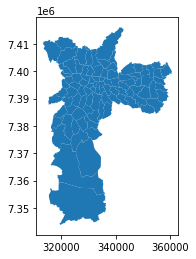

In [ ]:
dados_mapa.plot()

## <font color='dark'> **5.2 Tratamento de dados geográficos**

In [ ]:
dados_mapa = dados_mapa.sort_values('ds_codigo')
dados_mapa

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
38,1,MOOCA,25,ARA,AGUA RASA,"POLYGON ((341093.380 7391912.491, 341093.329 7..."
40,10,MOOCA,25,BRS,BRAS,"POLYGON ((333984.370 7396019.757, 333985.591 7..."
3,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7..."
52,12,BUTANTA,10,BUT,BUTANTA,"POLYGON ((322177.067 7393085.002, 322176.956 7..."
6,13,CASA VERDE-CACHOEIRINHA,04,CAC,CACHOEIRINHA,"POLYGON ((330950.659 7402181.997, 330944.935 7..."
...,...,...,...,...,...,...
10,92,VILA MARIA-VILA GUILHERME,07,VMD,VILA MEDEIROS,"POLYGON ((340579.417 7401672.553, 340579.493 7..."
47,93,VILA PRUDENTE,29,VPR,VILA PRUDENTE,"POLYGON ((341731.295 7388459.495, 341723.755 7..."
51,94,BUTANTA,10,VSO,VILA SONIA,"POLYGON ((320805.525 7390280.495, 320824.353 7..."
1,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7..."


In [ ]:
distritos_sp = distritos_sp.sort_values('cod_ibge')
distritos_sp

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings
0,1,Água Rasa,1961,34.619999,7.6,32,13.860000,-1.84,52.980000,0.00,125.610001,0.682371,-0.705531,0.284486
9,2,Brás,1942,28.969999,7.0,30,13.640000,-4.48,120.669998,0.00,76.190002,0.114900,-0.361695,0.016479
10,3,Brasilândia,975,8.220000,5.8,22,22.000000,3.14,125.019997,16.60,112.059998,-1.531760,-0.046604,-0.849523
11,4,Butantã,2311,50.320000,8.4,31,18.129999,-1.60,44.730000,0.26,42.820000,0.843868,0.596856,0.541908
12,5,Cachoeirinha,1347,12.340000,6.2,23,15.710000,2.28,105.599998,17.42,105.919998,-1.011355,0.365884,-0.509588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,Vila Medeiros,1405,19.760000,6.8,27,15.430000,-1.41,77.980003,2.49,188.929993,-0.099947,-1.738918,-0.280003
92,93,Vila Prudente,1755,32.080002,7.2,30,14.360000,-2.55,66.510002,7.43,101.440002,0.292861,-0.162769,0.140212
93,94,Vila Sônia,2970,41.410000,7.4,27,16.760000,-0.90,74.680000,14.93,80.120003,0.203269,1.057936,0.248800
94,95,São Domingos,2047,23.510000,6.8,26,14.300000,0.71,62.349998,8.55,72.919998,-0.117800,0.647456,0.018893


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from unidecode import unidecode

In [ ]:
nomes_distritos = [unidecode(distrito).upper() for distrito in distritos_sp['distritos']]
nomes_distritos

['AGUA RASA',
 'BRAS',
 'BRASILANDIA',
 'BUTANTA',
 'CACHOEIRINHA',
 'CAMBUCI',
 'CAMPO BELO',
 'CAMPO GRANDE',
 'CAMPO LIMPO',
 'CANGAIBA',
 'CAPAO REDONDO',
 'ALTO DE PINHEIROS',
 'CARRAO',
 'CASA VERDE',
 'CIDADE ADEMAR',
 'CIDADE DUTRA',
 'CIDADE LIDER',
 'CIDADE TIRADENTES',
 'CONSOLACAO',
 'CURSINO',
 'ERMELINO MATARAZZO',
 'FREGUESIA DO O',
 'ANHANGUERA',
 'GRAJAU',
 'GUAIANASES',
 'MOEMA',
 'IGUATEMI',
 'IPIRANGA',
 'ITAIM BIBI',
 'ITAIM PAULISTA',
 'ITAQUERA',
 'JABAQUARA',
 'JACANA',
 'ARICANDUVA',
 'JAGUARA',
 'JAGUARE',
 'JARAGUA',
 'JARDIM ANGELA',
 'JARDIM HELENA',
 'JARDIM PAULISTA',
 'JARDIM SAO LUIS',
 'JOSE BONIFACIO',
 'LAPA',
 'LIBERDADE',
 'ARTUR ALVIM',
 'LIMAO',
 'MANDAQUI',
 'MARSILAC',
 'MOOCA',
 'MORUMBI',
 'PARELHEIROS',
 'PARI',
 'PARQUE DO CARMO',
 'PEDREIRA',
 'PENHA',
 'BARRA FUNDA',
 'PERDIZES',
 'PERUS',
 'PINHEIROS',
 'PIRITUBA',
 'PONTE RASA',
 'RAPOSO TAVARES',
 'REPUBLICA',
 'RIO PEQUENO',
 'SARCOMA',
 'SANTA CECILIA',
 'BELA VISTA',
 'SANTANA',
 'S

In [ ]:
distritos_sp['nome_distrito'] = nomes_distritos

In [ ]:
distritos_distintos = distritos_sp['nome_distrito'].values != dados_mapa['ds_nome'].values
distritos_distintos.sum()

1

In [ ]:
distritos_sp[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings,nome_distrito
67,65,Sarcomã,1608,19.1,6.8,26,13.02,0.53,82.18,20.34,152.720001,-0.387175,-0.071781,-0.222492,SARCOMA


In [ ]:
dados_mapa[distritos_distintos]

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
72,68,IPIRANGA,13,SAC,SACOMA,"POLYGON ((338736.624 7387832.779, 338733.609 7..."


In [ ]:
distritos_sp.replace({'SARCOMA':'SACOMA', 'Sarcomã':'Sacoma'}, inplace = True)

In [ ]:
distritos_sp[distritos_distintos]

,cod_ibge,distritos,renda,quota,escolaridade,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings,nome_distrito
67,65,Sacoma,1608,19.1,6.8,26,13.02,0.53,82.18,20.34,152.720001,-0.387175,-0.071781,-0.222492,SACOMA


In [ ]:
dados_completos = dados_mapa.merge(distritos_sp, left_on = 'ds_nome', right_on = 'nome_distrito')
dados_completos

,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry,cod_ibge,distritos,renda,quota,...,idade,mortalidade,txcresc,causasext,favel,denspop,F1,F2,Rankings,nome_distrito
0,1,MOOCA,25,ARA,AGUA RASA,"POLYGON ((341093.380 7391912.491, 341093.329 7...",1,Água Rasa,1961,34.619999,...,32,13.860000,-1.84,52.980000,0.00,125.610001,0.682371,-0.705531,0.284486,AGUA RASA
1,10,MOOCA,25,BRS,BRAS,"POLYGON ((333984.370 7396019.757, 333985.591 7...",2,Brás,1942,28.969999,...,30,13.640000,-4.48,120.669998,0.00,76.190002,0.114900,-0.361695,0.016479,BRAS
2,11,FREGUESIA-BRASILANDIA,03,BRL,BRASILANDIA,"POLYGON ((324895.091 7404257.969, 324893.588 7...",3,Brasilândia,975,8.220000,...,22,22.000000,3.14,125.019997,16.60,112.059998,-1.531760,-0.046604,-0.849523,BRASILANDIA
3,12,BUTANTA,10,BUT,BUTANTA,"POLYGON ((322177.067 7393085.002, 322176.956 7...",4,Butantã,2311,50.320000,...,31,18.129999,-1.60,44.730000,0.26,42.820000,0.843868,0.596856,0.541908,BUTANTA
4,13,CASA VERDE-CACHOEIRINHA,04,CAC,CACHOEIRINHA,"POLYGON ((330950.659 7402181.997, 330944.935 7...",5,Cachoeirinha,1347,12.340000,...,23,15.710000,2.28,105.599998,17.42,105.919998,-1.011355,0.365884,-0.509588,CACHOEIRINHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,VILA MARIA-VILA GUILHERME,07,VMD,VILA MEDEIROS,"POLYGON ((340579.417 7401672.553, 340579.493 7...",92,Vila Medeiros,1405,19.760000,...,27,15.430000,-1.41,77.980003,2.49,188.929993,-0.099947,-1.738918,-0.280003,VILA MEDEIROS
92,93,VILA PRUDENTE,29,VPR,VILA PRUDENTE,"POLYGON ((341731.295 7388459.495, 341723.755 7...",93,Vila Prudente,1755,32.080002,...,30,14.360000,-2.55,66.510002,7.43,101.440002,0.292861,-0.162769,0.140212,VILA PRUDENTE
93,94,BUTANTA,10,VSO,VILA SONIA,"POLYGON ((320805.525 7390280.495, 320824.353 7...",94,Vila Sônia,2970,41.410000,...,27,16.760000,-0.90,74.680000,14.93,80.120003,0.203269,1.057936,0.248800,VILA SONIA
94,95,PIRITUBA-JARAGUA,02,SDO,SAO DOMINGOS,"POLYGON ((319854.036 7402894.086, 319864.990 7...",95,São Domingos,2047,23.510000,...,26,14.300000,0.71,62.349998,8.55,72.919998,-0.117800,0.647456,0.018893,SAO DOMINGOS


## <font color='dark'> **5.3 Visualização do mapa estático**

In [ ]:
import matplotlib.pyplot as plt

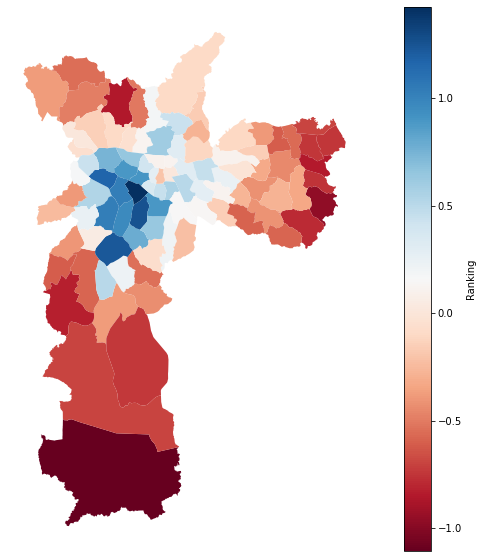

In [ ]:
dados_completos.plot(column = 'Rankings', legend = True, 
                     legend_kwds = {'label': 'Ranking', 'orientation':'vertical'},
                     cmap = 'RdBu', figsize = (15,10))
plt.axis('off');

In [ ]:
dados_completos['coords'] = dados_completos['geometry'].apply(lambda x: x.representative_point().coords[0])

In [ ]:
dados_completos['coords']

0      (339387.2901789259, 7393023.008609328)
1      (335030.8347422852, 7395347.285876686)
2      (327333.5972932541, 7405864.031109051)
3     (324240.99256249954, 7392411.333929993)
4      (330060.6684117636, 7405750.576595939)
                       ...                   
91     (338906.5056916763, 7401566.226537274)
92    (339299.39560524246, 7390001.382577162)
93    (322450.19648824795, 7389005.650136896)
94      (321422.2098127461, 7400742.57279521)
95     (355969.9058801238, 7396523.635873429)
Name: coords, Length: 96, dtype: object

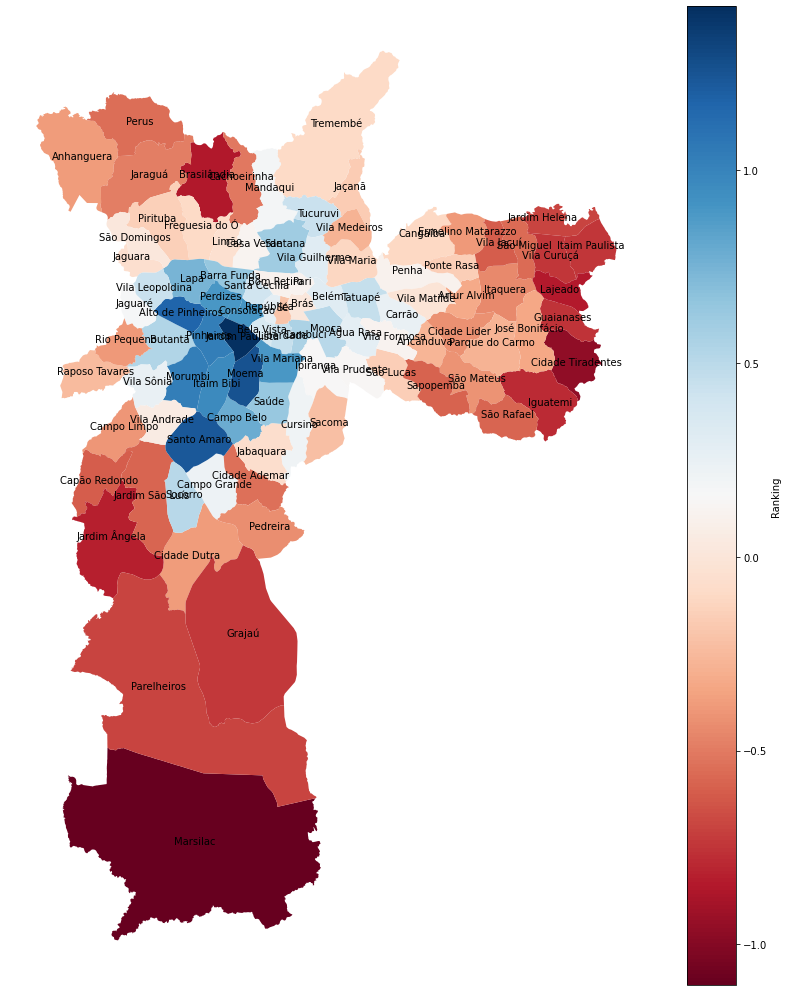

In [ ]:
dados_completos.plot(column = 'Rankings', legend = True, 
                     legend_kwds = {'label': 'Ranking', 'orientation':'vertical'},
                     cmap = 'RdBu', figsize = (15,18))
plt.axis('off')
for indice, linha in dados_completos.iterrows():
    plt.annotate(s = linha['distritos'], xy=linha['coords'], horizontalalignment = 'center', color = 'black')

## <font color='dark'> **5.4 Visualização do mapa dinâmico**

In [ ]:
!pip install --upgrade folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

In [ ]:
folium.__version__

'0.12.1.post1'

In [ ]:
!pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mapclassify

In [ ]:
dados_completos.explore(column = 'Rankings',
                        cmap = 'seismic_r',
                        tooltip = 'distritos',
                        tooltip_kwds = dict(label = False))

In [ ]:
base = dados_completos.explore(column = 'Rankings',
                        cmap = 'seismic_r',
                        tooltip = 'distritos',
                        tooltip_kwds = dict(label = False),
                        name = 'Distritos do município de São Paulo')
folium.TileLayer('Open Street Map').add_to(base)
folium.TileLayer('Stamen Terrain').add_to(base)
folium.TileLayer('cartodbpositron').add_to(base)
folium.TileLayer('Stamen Toner').add_to(base)
folium.LayerControl().add_to(base)
base

In [ ]:
base.save('rankings.html')